<a href="https://colab.research.google.com/github/blueberrycrumble/AIFFEL_quest_cr/blob/master/p002_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Image Classification

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import shutil, os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.models import Sequential,Model
# from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
# from tensorflow.keras.layers import Conv2D, MaxPooling2D
# from tensorflow.keras.layers import BatchNormalization
# from tensorflow.keras.layers import LeakyReLU
# from tensorflow.keras import optimizers
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.preprocessing import image
# import cv2

from IPython.display import clear_output
%matplotlib inline

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

## 데이터셋 준비

In [ ]:
# 데이터셋 다운로드
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
!wget -P /content/ $_URL
!unzip -q cats_and_dogs_filtered.zip -d .

--2025-02-17 01:30:14--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.207, 74.125.135.207, 74.125.142.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   186MB/s    in 0.4s    

2025-02-17 01:30:14 (186 MB/s) - ‘/content/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
# train & validation 이미지 저장 경로 변수 저장
path = '/content/cats_and_dogs_filtered/'
train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')
print(train_dir)
print(validation_dir)

/content/cats_and_dogs_filtered/train
/content/cats_and_dogs_filtered/validation


In [ ]:
# directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
print(train_cats_dir)

# directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
print(train_dogs_dir)

# directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
print(validation_cats_dir)

# directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print(validation_dogs_dir)

/content/cats_and_dogs_filtered/train/cats
/content/cats_and_dogs_filtered/train/dogs
/content/cats_and_dogs_filtered/validation/cats
/content/cats_and_dogs_filtered/validation/dogs


In [ ]:
# 데이터 개수 확인
num_cats_tr = len(os.listdir(train_cats_dir))
print('total training cat images:', num_cats_tr)
num_dogs_tr = len(os.listdir(train_dogs_dir))
print('total training dog images:', num_dogs_tr)

print("--")

num_cats_val = len(os.listdir(validation_cats_dir))
print('total validation cat images:', num_cats_val)
num_dogs_val = len(os.listdir(validation_dogs_dir))
print('total validation dog images:', num_dogs_val)

print("--")

total_train = num_cats_tr + num_dogs_tr
print("Total training images:", total_train)
total_val = num_cats_val + num_dogs_val
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
--
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


## 파라미터 변수

In [ ]:
# parameter Initialization
batch_size = 64
epochs = 20
IMG_HEIGHT = 256
IMG_WIDTH = 256

## 이미지 시각화

In [ ]:
# 데이터를 시각화하기 위한 함수
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

## Image Augmentation 데이터 증강

Keras 의 ImageDataGenerator 클래스를 활용해 데이터를 증강한다.   
.flow_from_direcotry 를 사용해 파이프라인을 만든다.  
  -> 디렉토리에 저장된 이미지 데이터를 불러와서 배치 단위로 증강 및 전처리하여 모델에 바로 입력할 수 있는 형태로 생성한다.

In [ ]:
# 파이프라인을 통과한 데이터 증강
# range 는 0 ~ 표기숫자 사이에 랜덤하게 할당된다.
image_gen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    validation_split=0.2)

# Validation data generator 는 훈련용과 다르게 데이터 증강 필요 X
image_gen_val = ImageDataGenerator(rescale=1./255)

# 파이프라인으로 데이터 배치 공급
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


파이프라인을 만들때 훈련&검증 데이터를 나누는 다른 방법

훈련용 검증용 세트 나누기  
train_set = datagen.flow_from_directory(  
        train_dir,  
        target_size=(IMG_HEIGHT, IMG_WIDTH),  
        batch_size=batch_size,  
        subset='training')    
  

  
  

val_set = datagen.flow_from_directory(  
        train_dir,  
        target_size=(IMG_HEIGHT, IMG_WIDTH),    
        batch_size=batch_size,  
        subset='validation')  

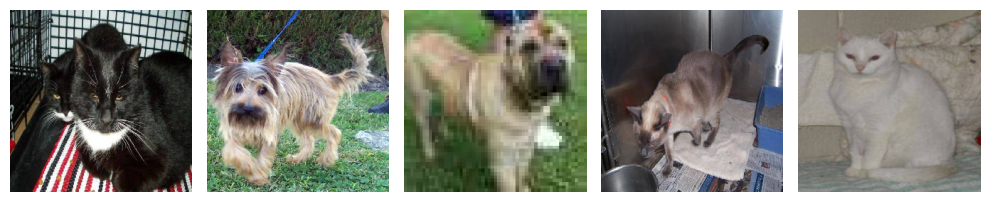

array([0., 1., 1., 0., 0.], dtype=float32)

In [ ]:
# 검증데이터 확인
sample_training_images,_ =next(val_data_gen)
plotImages(sample_training_images[:5])
_[:5] # 라벨(0=고양이, 1=개)

In [ ]:
# 훈련데이터의 크기
train_data_gen[0][0].shape

(64, 256, 256, 3)

##### 코드가 헷갈려서 실행한 삽질 1

In [ ]:
batch = train_data_gen[0]  # First batch
print(type(batch))

<class 'tuple'>


In [ ]:
print(train_data_gen[0][0].shape) # 첫번째 배치의 이미지들
# OUTPUT => (batch_size,img_height,img_width,channels)

(64, 256, 256, 3)


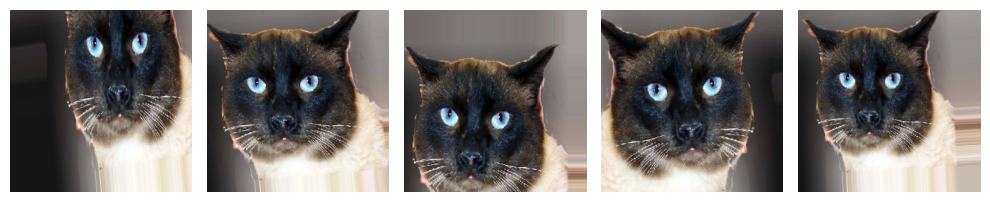

In [ ]:
# 훈련 데이터 확인
# [0][0][0]첫번째 배치의 첫번째 이미지
# list comprehension: train_data_gen[0][0][0] 을 다섯번 반복
# => 첫번째 배치의 (증강된)첫번째 이미지를 5섯장 생성
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

## CNN 모델

In [ ]:
# Functional API 사용
# x는 다음 레이어로 전달되는 해당 레이어의 아웃풋

input_layer=tf.keras.layers.Input(shape=(256, 256, 3))
x=tf.keras.layers.Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(input_layer)
x=tf.keras.layers.Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(x)
# x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
# x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
# x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(1024, activation='relu')(x)
x=tf.keras.layers.Dense(512, activation='relu')(x)
out_layer=tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 256, 256, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │     134,218,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 135,031,073 (515.10 MB)

 Trainable params: 135,031,073 (515.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.Adam(learning_rate=0.0001)
metric=tf.keras.metrics.binary_accuracy
model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

# callbacks_list= [tf.keras.callbacks.TensorBoard(log_dir='log_dir', histogram_freq=1)]
# callback 함수를 활용하고 싶다면 추가해서 학습하는 데에 활용해 보세요.

## CNN 모델 훈련

In [ ]:
history = model.fit(
      train_data_gen,
      steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))//batch_size,
      epochs=epochs,
      validation_data=val_data_gen,
      # callbacks=callbacks_list,
      validation_freq=1)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 256, 256, 3))
  warnings.warn(msg)


31/31 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - binary_accuracy: 0.5123 - loss: 0.6975 - val_binary_accuracy: 0.5470 - val_loss: 0.6882
Epoch 2/20
 1/31 ━━━━━━━━━━━━━━━━━━━━ 9s 324ms/step - binary_accuracy: 0.5000 - loss: 0.6926

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - binary_accuracy: 0.5000 - loss: 0.6926 - val_binary_accuracy: 0.5100 - val_loss: 0.6876
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - binary_accuracy: 0.5259 - loss: 0.6875 - val_binary_accuracy: 0.6230 - val_loss: 0.6553
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - binary_accuracy: 0.6875 - loss: 0.6549 - val_binary_accuracy: 0.6260 - val_loss: 0.6526
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - binary_accuracy: 0.6194 - loss: 0.6470 - val_binary_accuracy: 0.6240 - val_loss: 0.6370
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - binary_accuracy: 0.4688 - loss: 0.7460 - val_binary_accuracy: 0.6590 - val_loss: 0.6157
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - binary_accuracy: 0.6287 - loss: 0.6389 - val_binary_accuracy: 0.6790 - val_loss: 0.5990
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - binary_accuracy: 0.6719 - loss: 0.5822 - val_binary_accuracy: 0.6770 - val_loss: 0.5963
Epoch 9/20
31/31 ━━━━━━━━━━

## 디버깅

Val_binary_accuracy가 움직이지 않아서 overfitting이 의심된다.  
에포크를 20으로 늘리고 러닝레이트를 0.005로 낮춰보거나 노말라이제이션레이어를 숨겨봐도 0.5에서 정지하는 모습을 보임  


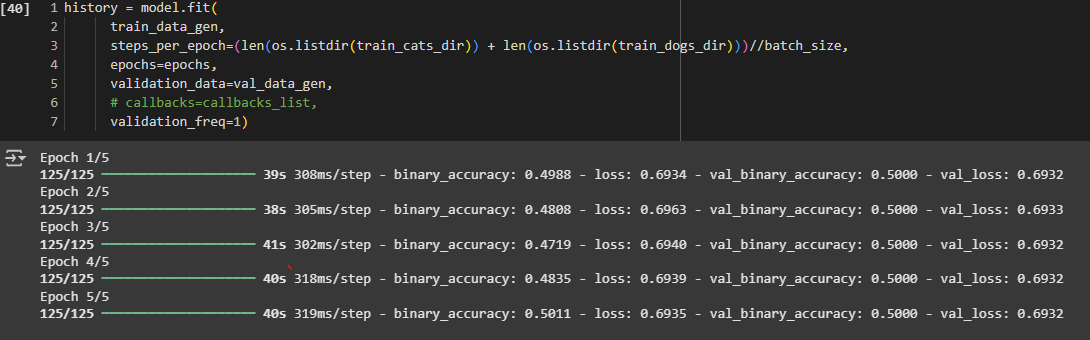  

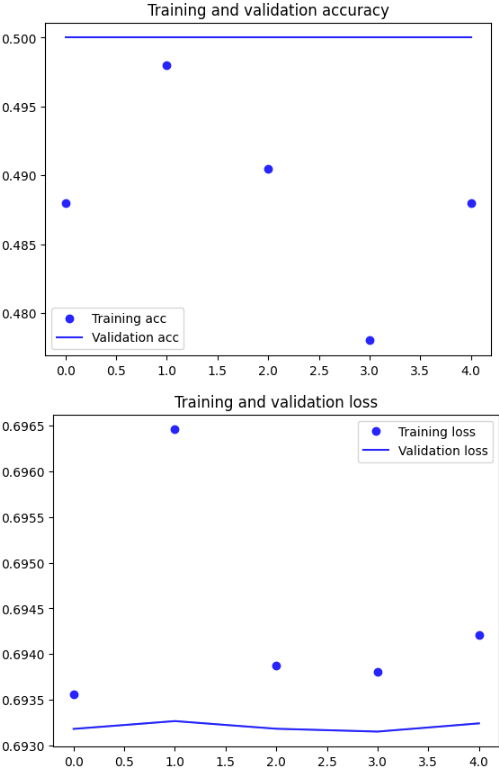  
  
왜 이렇게 점으로 뜨는지도 의문  
-----------------------------------------------  

learning rate를 0.0001로 줄였더니 학습이 되었다!  
adam 이 러닝레이트를 자동으로 조정하는 기능이 있어서 디폴트값 그대로 사용해도 된다. 0.001 이 디폴트값인데 그거보다 낮게 썼네..   

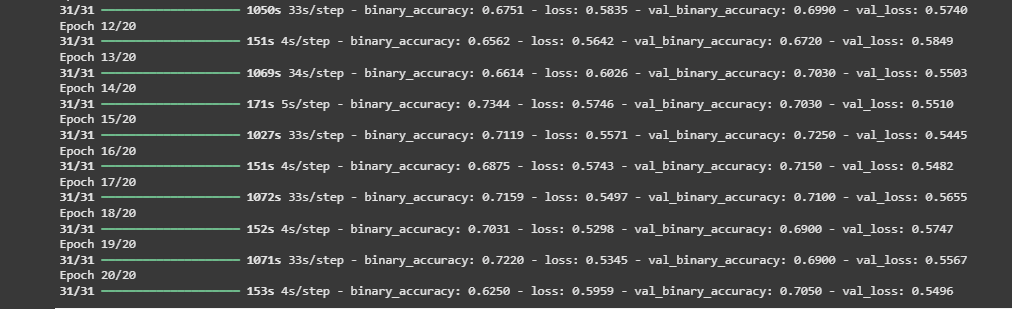

## CNN 모델 결과 시각화

...이 모델 일을 안하네? 에서 알잘딱깔센이 되었구요. 라고 하고 싶지만 아직 부족함.  

에포크 10에서 끊었어도 괜찮았을 것 같기도 하다.

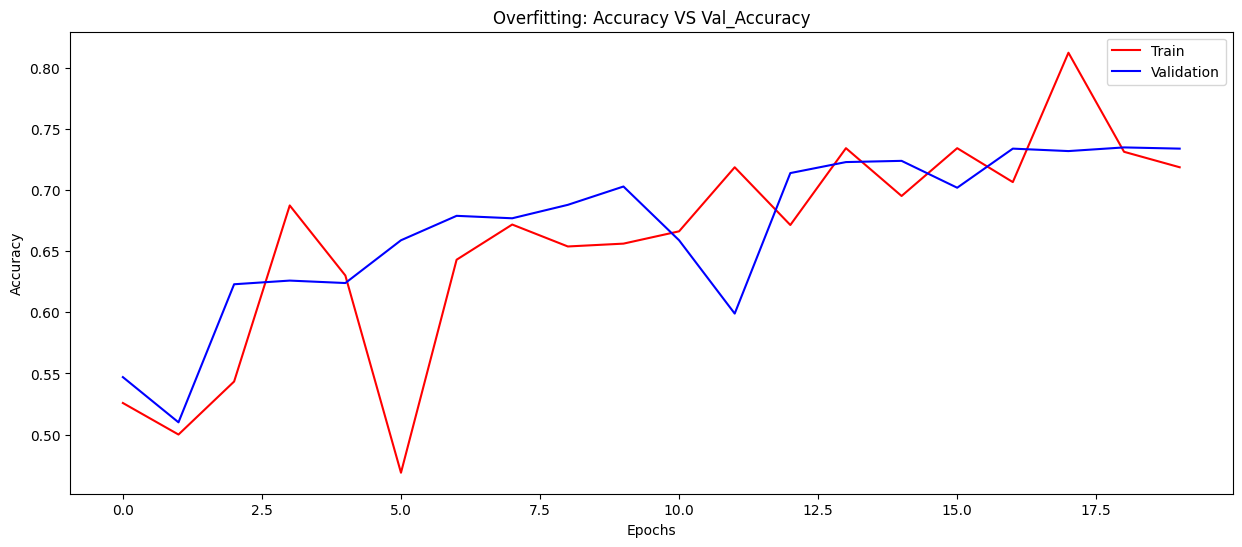

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(history.history["binary_accuracy"],color = "red",label = "Train")
plt.plot(history.history["val_binary_accuracy"],color = "blue", label = "Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Overfitting: Accuracy VS Val_Accuracy")
plt.legend()
plt.show()

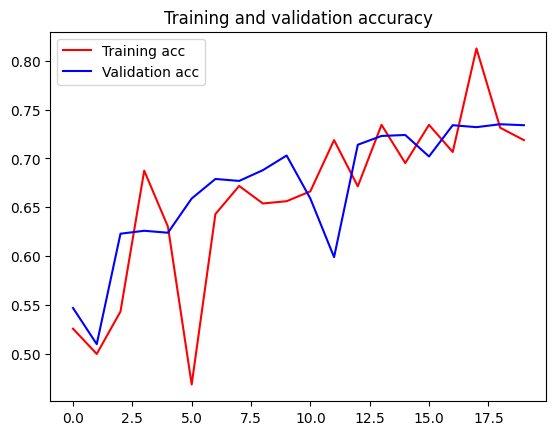

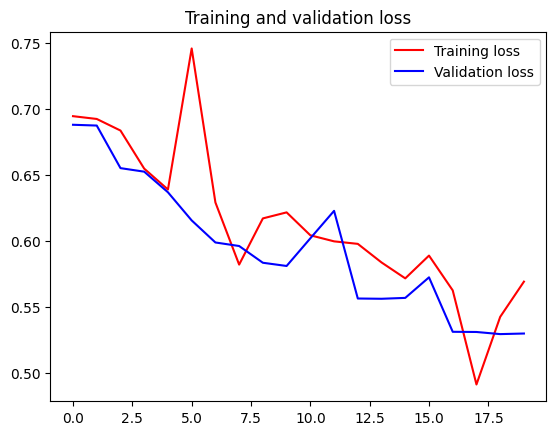

In [ ]:

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'r', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'r', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Validation loss가 아직 바닥을 기지 않아서 언더피팅인 것 같다.
- 에포크 수를 늘려서 더 훈련을 시킬 필요가 있다.   
- 하이퍼 파라미터 튜닝이나 다른 모델을 써서 성능을 올릴 수 있겠다.
- 아마도 러닝레이트가 너무 낮아서 불안정한 것은 아닐까 생각됨. 관련이 있는지 확신은 없음  



## VGG16 모델 구현

In [ ]:
# 레이어 쌓기
input_layer=tf.keras.layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)) #이미지사이즈 줄이고 시작 (256)
x=tf.keras.layers.Conv2D(32,(3,3), strides=1, activation='relu', padding='same')(input_layer)
x=tf.keras.layers.Conv2D(32,(3,3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2,2))(x)

x=tf.keras.layers.Conv2D(64,(3,3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(64,(3,3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2,2))(x)

x=tf.keras.layers.Conv2D(128,(3,3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(128,(3,3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2,2))(x)

x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(256, activation='relu')(x)
x=tf.keras.layers.Dense(32, activation='relu')(x)
out_layer=tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(input_layer, out_layer)
# model = tf.keras.Model(inputs=[input_layer],outputs=[out_layer])
model.summary()

# callbacks_list= [tf.keras.callbacks.TensorBoard(log_dir='log_dir', histogram_freq=1)]

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 256, 256, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256, 256, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │      33,554,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,850,849 (129.13 MB)

 Trainable params: 33,850,401 (129.13 MB)

 Non-trainable params: 448 (1.75 KB)

Non-trainable params: 역전파(Backpropagation) 시 가중치가 학습되지 않는 파라미터.  


주로 발생하는 경우:  
- Batch Normalization Layer:  
moving mean 및 moving variance는 훈련 중에 지수 이동 평균으로 업데이트되지만, 가중치로 학습되지는 않는다.

- Pre-trained 모델 사용 시:
전이 학습(Transfer Learning) 에서 특정 층을 동결(Frozen) 시키면 해당 층의 가중치는 업데이트되지 않는다.
예: layer.trainable = False 설정 시  

- 고정된 Embedding Layer:
사전에 학습된 임베딩을 사용하고 업데이트하지 않도록 설정할 때 발생한다.  

- 정규화 및 Dropout Layer:
일부 정규화 레이어에서는 파라미터가 있지만 학습되지 않고 고정된 상태.

In [ ]:
for layer in model.layers:
    print(layer.name, layer.trainable, layer.weights)

input_layer_1 True []
conv2d_6 True [<Variable path=conv2d_6/kernel, shape=(3, 3, 3, 32), dtype=float32, value=[[[[ 0.04090594 -0.02445781 -0.10173514  0.05596989 -0.02493598
     0.02368958  0.0484454   0.06417835  0.05065386  0.03657089
    -0.10646025 -0.11006689  0.07642122 -0.09724592 -0.00561233
     0.07314435  0.09963328  0.10056165  0.01163688 -0.02023061
     0.13436939  0.12484179 -0.0801007   0.00937194  0.07264225
     0.05357768 -0.04039213 -0.05385365  0.08667825  0.0358842
     0.12495936 -0.07646705]
   [ 0.13468842  0.02184674  0.12610881 -0.116095   -0.04566731
     0.04766925  0.0347442   0.07272576  0.13548313 -0.01330753
    -0.13450693 -0.04455815 -0.01574032 -0.03223386 -0.09140123
    -0.1295711   0.01427875 -0.00371382  0.09361003 -0.08603276
     0.00870048 -0.01533852 -0.07584136  0.0205877   0.03446692
     0.08250237  0.11254947 -0.12536545  0.12132721 -0.1244335
    -0.09529141  0.03881082]
   [-0.09673212 -0.09864053 -0.08016638 -0.11762705  0.0003688
  

In [ ]:
for w in layer.weights:
    print(w.name, w.shape)

kernel (32, 1)
bias (1,)


In [ ]:
# 손실함수, 옵티마이저, 메트릭
loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.Adam(learning_rate=0.001)
metric=tf.keras.metrics.binary_accuracy
model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

In [ ]:
type(train_data_gen[0])

tuple

In [ ]:
history = model.fit(
        # data generator는 입력 데이터와 타겟(라벨)의 batch를 끝없이 반환한다.
        # 따라서 한 번의 에포크에 generator로부터 얼마나 많은 샘플을 뽑을지 모델에 전달해야 한다.
        train_data_gen,
        # 한 에포크 동안 배치가 학습하는 스텝 수
        steps_per_epoch=(len(os.listdir(train_cats_dir))+len(os.listdir(train_dogs_dir)))//batch_size,
        epochs=epochs,
        validation_data=val_data_gen,
        # callbacks=callbacks_list,
        validation_freq=1)


Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - binary_accuracy: 0.5039 - loss: 7.9677 - val_binary_accuracy: 0.5160 - val_loss: 4.1266
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - binary_accuracy: 0.5156 - loss: 1.3925 - val_binary_accuracy: 0.5210 - val_loss: 4.1316
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - binary_accuracy: 0.5354 - loss: 0.7176 - val_binary_accuracy: 0.5320 - val_loss: 10.8120
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - binary_accuracy: 0.4531 - loss: 0.7050 - val_binary_accuracy: 0.5320 - val_loss: 10.7308
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - binary_accuracy: 0.5530 - loss: 0.6788 - val_binary_accuracy: 0.5380 - val_loss: 9.9990
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - binary_accuracy: 0.5781 - loss: 0.7099 - val_binary_accuracy: 0.5380 - val_loss: 9.9872
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - binary_accuracy: 0.5638 - loss: 0.6780 - val_binary_accuracy: 0.5340 - val_loss: 8.0026
Epoch 8/20
31/3

## 디버깅 2

In [ ]:
# 데이터 타입 확인
print("데이터 타입 확인:", type(train_data_gen[0][0][0]))

# float 타입을 int로 변환 (필요한 경우)
# train_data_gen = tuple(int(item) if isinstance(item, float) else item for item in train_data_gen)


데이터 타입 확인: <class 'numpy.ndarray'>


In [ ]:
print("steps_per_epoch:", len(train_data_gen))
print("validation_steps:", len(val_data_gen))
print("batch_size type:", type(batch_size))
print("epochs type:", type(epochs))
print("train_data_gen.batch_size:", train_data_gen.batch_size)
print("val_data_gen.batch_size:", val_data_gen.batch_size)

# float 에러 발생 원인을 찾기 위해, 값이 정수로 반환되는지 확인

steps_per_epoch: 32
validation_steps: 16
batch_size type: <class 'int'>
epochs type: <class 'int'>
train_data_gen.batch_size: 64
val_data_gen.batch_size: 64


# Project 2: Object Detection

In [ ]:
# Tensorflow와 Tensoflow Hub에 있는 이미 학습된 모델을 활용하기 위한 모듈
import tensorflow as tf
import tensorflow_hub as hub

# 이미지를 다운로드하는 데에 사용하는 모듈
import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO

# 이미지에 선과 폰트를 넣기 위한 모듈
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# Detection하는 데에 소요된 시간을 점검하기 위한 모듈
import time

## 함수 정의

### 이미지 시각화 함수

In [ ]:
def display_image(image):
  fig = plt.figure(figsize=(20, 15))
  plt.grid(False)
  plt.imshow(image)

### 이미지 다운로드 & 리사이즈 함수

In [ ]:
def download_and_resize_image(url, new_width=256, new_height=256, display=False):

  _, filename = tempfile.mkstemp(suffix=".jpg")
  response = urlopen(url)
  image_data = response.read()
  image_data = BytesIO(image_data)  # 이미지 읽기
  pil_image = Image.open(image_data)
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS) # 이미지 조정
  pil_image_rgb = pil_image.convert("RGB") #RBG로 변환
  pil_image_rgb.save(filename, format="JPEG", quality=90) # 이미지 저장
  print("Image downloaded to %s." % filename)
  if display:
    display_image(pil_image)
  return filename

### Bounding Box 생성 함수

In [ ]:
def draw_bounding_box_on_image(image,
                               ymin, xmin, ymax, xmax,
                               color,
                               font,
                               thickness=4,
                               display_str_list=()):

  draw = ImageDraw.Draw(image)
  im_width, im_height = image.size
  (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                ymin * im_height, ymax * im_height)

# BBox 테두리 그리기
  draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
             (left, top)],
            width=thickness,
            fill=color)

  display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]

  total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

  if top > total_display_str_height:
    text_bottom = top
  else:
    text_bottom = top + total_display_str_height

  for display_str in display_str_list[::-1]:
    text_width, text_height = font.getsize(display_str)
    margin = np.ceil(0.05 * text_height)
    draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                    (left + text_width, text_bottom)],
                   fill=color)
    draw.text((left + margin, text_bottom - text_height - margin),
              display_str,
              fill="black",
              font=font)
    text_bottom -= text_height - 2 * margin

In [ ]:
# BBox 그리기
def draw_boxes(image, boxes, class_names, scores, max_boxes=10, min_score=0.1):
  colors = list(ImageColor.colormap.values())

  try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
                              25)
  except IOError:
    print("Font not found, using default font.")
    font = ImageFont.load_default()

# BBox 그리기 적용
  for i in range(min(boxes.shape[0], max_boxes)):
    if scores[i] >= min_score:
      ymin, xmin, ymax, xmax = tuple(boxes[i])  # 박스 좌표값
      display_str = "{}: {}%".format(class_names[i].decode("ascii"),
                                     int(100 * scores[i]))
      color = colors[hash(class_names[i]) % len(colors)]
      image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
      draw_bounding_box_on_image(
          image_pil,
          ymin,
          xmin,
          ymax,
          xmax,
          color,
          font,
          display_str_list=[display_str])
      np.copyto(image, np.array(image_pil))
  return image

In [ ]:
# 이미지 로드 함수
def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  return img

In [ ]:
# Detector 실행 함수

def run_detector(detector, path):
  img = load_img(path)

  converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]

# 소요시간 측정
  start_time = time.time()
  result = detector(converted_img)
  end_time = time.time()

  result = {key:value.numpy() for key,value in result.items()}

# 이미지 추론 개수와 추론 시간 출력
  print("Found %d objects." % len(result["detection_scores"]))
  print("Inference time: ", end_time-start_time)

# 이미지 내 박스로 entity, scores를 추가하여 출력
  image_with_boxes = draw_boxes(
      img.numpy(), result["detection_boxes"],
      result["detection_class_entities"], result["detection_scores"])

  display_image(image_with_boxes)

## Import Image and Pre-trained Model

In [ ]:
#이미지 로드
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Torneo_beach_handball.jpg/640px-Torneo_beach_handball.jpg"
downloaded_image_path = download_and_resize_image(image_url, 1280, 856, True)  # new_width와 new_height를 변경해 보세요.

In [ ]:
# (pre-trained) InceptionResnet 모델을 사용한 Faster RCNN 모델 임포트
module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"

detector = hub.load(module_handle).signatures['default'] # detector에 사용할 모듈 저장

## 실행

In [ ]:
# detector 실행
run_detector(detector, downloaded_image_path)

#### 이미지 테스트

## 다양한 pre-trained model 테스트